In [1]:
import mat4py
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import scipy.io
import os 
from sklearn.model_selection import KFold
import math
import scipy.io
import matplotlib.pyplot as plt
from random import sample


## 
## load data

CellNames = scipy.io.loadmat('../Cells2Connectomes/CellType_Names.mat')
CellNames = CellNames['cellnames'] 

Connectomes = scipy.io.loadmat('../Cells2Connectomes/Connectomes.mat')
Connectome_direct = Connectomes['C_dir']


'''

Region volumes, in a 424 vector, to get connectivity density, divide
% each row in connectomes by each entry in the vector to get density. Units
% are in 200 micron per vertex voxels.

'''

CellType_volumn = mat4py.loadmat('../Cells2Connectomes/Regional_Volumes.mat')
CellType_volumn = CellType_volumn['region_vols']
Celltype_volumn =np.array([np.array(xi) for xi in CellType_volumn])
print(Celltype_volumn.shape)

# Nomarlize by the entry

Connectome_direct_density = Connectome_direct/Celltype_volumn

(424, 1)


In [2]:
# Import Tasic data, using the 25 cell type features

Cell_type = mat4py.loadmat('../Cells2Connectomes/Tasic_nG_606_TypeDensity.mat')
Cell_type = Cell_type['cell_type_density_nG606']
Celltype_mtx =np.array([np.array(xi) for xi in Cell_type])

# Important : normalizing via the columns

Celltype_mtx_norm =(Celltype_mtx-Celltype_mtx.min(axis=0)) / (Celltype_mtx.max(axis=0) - Celltype_mtx.min(axis=0) )


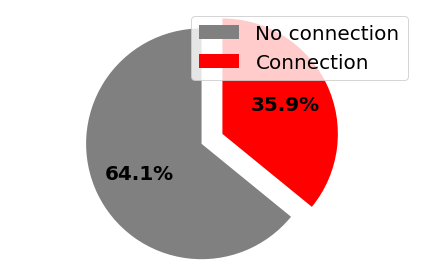

In [3]:
#pie chart 

import matplotlib.pyplot as plt

labels=['No connection','Connection']
explode = (0, 0.2)
X=[114976,64376] 
colors = ['grey','red']
fig1, ax1 = plt.subplots()
wedges, texts, autotexts  =ax1.pie(X, explode=explode,  colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.legend(wedges, labels,
          loc='best', fontsize = 20)
plt.setp(autotexts, size=20, weight="bold")

plt.tight_layout()
plt.show()


In [3]:
# random forest

# build a df to store the information

# instead use the subset, this time I am trying the whole, which might be not suitable for ML, but I just wanted a positive control
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
res_df =[]


Target = []
Dataset = []


for i in range(Celltype_mtx_norm.shape[0]):
    for j in range(Celltype_mtx_norm.shape[0]):
        # ignore self connectivity

        if i == j:
            pass       
        else:

            #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
            #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
            Dataset.append(np.concatenate((Celltype_mtx_norm[i,:],Celltype_mtx_norm[j,:])))
            Target.append(Connectome_direct_density[i,j])
            
            

Dataset = np.stack(Dataset)

import statistics as stats
cutoff = stats.mean(Target)
class_Target = [1 if x >0 else x for x in Target]
class_Target =np.array([np.array(xi) for xi in class_Target])   


(179352, 5)

In [33]:
import random

random.seed(99)

In [34]:
index = random.sample(list(range(pca.shape[0])), 1000)

Text(0, 0.5, 'PC2')

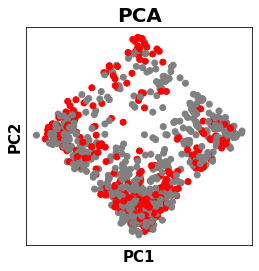

In [68]:
# pca 

from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(Dataset)
pca.shape

fig2, ax2 = plt.subplots()
colors = {1:'red', 0:'grey'}
ax2.axis('equal')
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')
plt.scatter(pca[:, 0][index], pca[:, 1][index], c = pd.Series(class_Target[index]).map(colors),
           )#, '.')
x0,x1 = ax2.get_xlim()
y0,y1 = ax2.get_ylim()
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('PCA', fontsize = 20, weight = 'bold')
plt.xlabel('PC1', weight="bold", fontsize = 15)
plt.ylabel('PC2', weight="bold", fontsize = 15)

In [61]:
# t sne

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Dataset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 179352 samples in 0.009s...
[t-SNE] Computed neighbors for 179352 samples in 629.829s...
[t-SNE] Computed conditional probabilities for sample 1000 / 179352
[t-SNE] Computed conditional probabilities for sample 2000 / 179352
[t-SNE] Computed conditional probabilities for sample 3000 / 179352
[t-SNE] Computed conditional probabilities for sample 4000 / 179352
[t-SNE] Computed conditional probabilities for sample 5000 / 179352
[t-SNE] Computed conditional probabilities for sample 6000 / 179352
[t-SNE] Computed conditional probabilities for sample 7000 / 179352
[t-SNE] Computed conditional probabilities for sample 8000 / 179352
[t-SNE] Computed conditional probabilities for sample 9000 / 179352
[t-SNE] Computed conditional probabilities for sample 10000 / 179352
[t-SNE] Computed conditional probabilities for sample 11000 / 179352
[t-SNE] Computed conditional probabilities for sample 12000 / 179352
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 121000 / 179352
[t-SNE] Computed conditional probabilities for sample 122000 / 179352
[t-SNE] Computed conditional probabilities for sample 123000 / 179352
[t-SNE] Computed conditional probabilities for sample 124000 / 179352
[t-SNE] Computed conditional probabilities for sample 125000 / 179352
[t-SNE] Computed conditional probabilities for sample 126000 / 179352
[t-SNE] Computed conditional probabilities for sample 127000 / 179352
[t-SNE] Computed conditional probabilities for sample 128000 / 179352
[t-SNE] Computed conditional probabilities for sample 129000 / 179352
[t-SNE] Computed conditional probabilities for sample 130000 / 179352
[t-SNE] Computed conditional probabilities for sample 131000 / 179352
[t-SNE] Computed conditional probabilities for sample 132000 / 179352
[t-SNE] Computed conditional probabilities for sample 133000 / 179352
[t-SNE] Computed conditional probabilities for sample 134000 / 179352
[t-SNE] Computed con

Text(0, 0.5, 't-SNE 2')

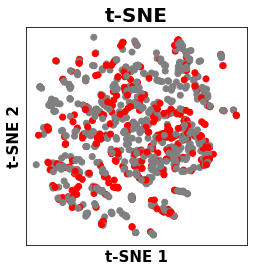

In [69]:
fig3, ax3 = plt.subplots()
colors = {1:'red', 0:'grey'}
ax3.axis('equal')
ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')
plt.scatter(tsne_results[:, 0][index], tsne_results[:, 1][index], c = pd.Series(class_Target[index]).map(colors),
           )#, '.')
x0,x1 = ax3.get_xlim()
y0,y1 = ax3.get_ylim()
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('t-SNE', fontsize = 20, weight = 'bold')
plt.xlabel('t-SNE 1', weight="bold", fontsize = 15)
plt.ylabel('t-SNE 2', weight="bold", fontsize = 15)

In [104]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix


NameError: name 'RF_classifer' is not defined

In [34]:
CellNames = [CellNames[0][x][0] for x in list(range(25))]

In [35]:
CellNames

['Lamp5',
 'Meis2',
 'Pvalb',
 'Serpinf1',
 'Sncg',
 'Sst',
 'Vip',
 'CR',
 'L2_3_IT',
 'L4',
 'L5_IT',
 'L5_PT',
 'L6_CT',
 'L6_IT',
 'L6b',
 'NP',
 'Chrna6',
 'Gad2',
 'LGv',
 'Slc17a6',
 'Slc17a7',
 'Astro',
 'Macro',
 'Oligo',
 'Endo']

In [36]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle= True)
auc_list = []
acc_list = []
p = 0
for train_index, test_index in kf.split(Dataset):
    #print(train_index)
    #print(test_index)
    p = p +1
    print(p)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = Dataset[sub1], Dataset[sub2]
    y_train, y_test = class_Target[sub1], class_Target[sub2]
    RF_model = RandomForestClassifier(n_estimators=100, max_features = 20, #)
                                     class_weight = 'balanced')
    RF_model.fit(X_train, y_train)

    importances = RF_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    Celltype_scores = importances[:25] + importances[25:]
    

    
    if p ==1 :
        
        df_feature_important = {'Celltype_Names': CellNames, 'Feature_importance': list(Celltype_scores)}
        df_feature_important = pd.DataFrame(data=df_feature_important,dtype=np.int32)
    else:
        _df_feature_important = {'Celltype_Names': CellNames, 'Feature_importance': list(Celltype_scores)}
        _df_feature_important = pd.DataFrame(data=_df_feature_important,dtype=np.int32)
        df_feature_important = df_feature_important.append(_df_feature_important)
        


1
2
3
4
5
6
7
8
9
10


In [37]:
df_feature_important.to_csv('./Tasic_FI_classification.csv', sep = '\t')

In [27]:
df_feature_important = {'Celltype_Names': CellNames.reshape(25), 'Feature_importance': list(Celltype_scores)}

In [28]:
df_feature_important

{'Celltype_Names': array([array(['Lamp5'], dtype='<U5'), array(['Meis2'], dtype='<U5'),
        array(['Pvalb'], dtype='<U5'), array(['Serpinf1'], dtype='<U8'),
        array(['Sncg'], dtype='<U4'), array(['Sst'], dtype='<U3'),
        array(['Vip'], dtype='<U3'), array(['CR'], dtype='<U2'),
        array(['L2_3_IT'], dtype='<U7'), array(['L4'], dtype='<U2'),
        array(['L5_IT'], dtype='<U5'), array(['L5_PT'], dtype='<U5'),
        array(['L6_CT'], dtype='<U5'), array(['L6_IT'], dtype='<U5'),
        array(['L6b'], dtype='<U3'), array(['NP'], dtype='<U2'),
        array(['Chrna6'], dtype='<U6'), array(['Gad2'], dtype='<U4'),
        array(['LGv'], dtype='<U3'), array(['Slc17a6'], dtype='<U7'),
        array(['Slc17a7'], dtype='<U7'), array(['Astro'], dtype='<U5'),
        array(['Macro'], dtype='<U5'), array(['Oligo'], dtype='<U5'),
        array(['Endo'], dtype='<U4')], dtype=object),
 'Feature_importance': [0.03743836356520845,
  0.04793259062543177,
  0.0380503696049839,
  0.037

In [19]:
CellNames.shape

(1, 25)

In [20]:
Celltype_scores.reshape(1,25)

array([[0.03743836, 0.04793259, 0.03805037, 0.03716578, 0.0344186 ,
        0.04795344, 0.03632065, 0.05006431, 0.03100299, 0.03429427,
        0.02487087, 0.03164894, 0.0310592 , 0.0237491 , 0.03740546,
        0.04078833, 0.04219427, 0.04538966, 0.04882711, 0.04756441,
        0.02907634, 0.04180165, 0.03932934, 0.0668663 , 0.05478764]])

In [26]:
pd.DataFrame(data=df_feature_important,dtype=np.int32)

,Celltype_Names,Feature_importance
0,[Lamp5],0.037438
1,[Meis2],0.047933
2,[Pvalb],0.03805
3,[Serpinf1],0.037166
4,[Sncg],0.034419
5,[Sst],0.047953
6,[Vip],0.036321
7,[CR],0.050064
8,[L2_3_IT],0.031003
9,[L4],0.034294


In [6]:
acc_list

[0.7907560214094559,
 0.7886931311329171,
 0.7904098132143853,
 0.791747978812378,
 0.7913019236130471,
 0.7945915807081126,
 0.7879007527181489,
 0.7904655701143016,
 0.7870086423194871,
 0.7908558684137162]

In [7]:
auc_list

[0.8556134311212694,
 0.8578832771743988,
 0.8575390603950482,
 0.8564692462338861,
 0.8586926657948212,
 0.8576164278890211,
 0.8541432192999189,
 0.8573087589348758,
 0.8556854051192764,
 0.8548984128911283]

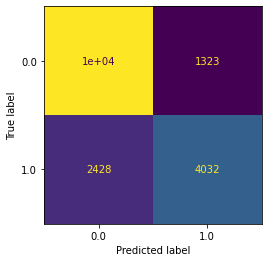

In [8]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(RF_model, X_test, y_test, colorbar = False) 

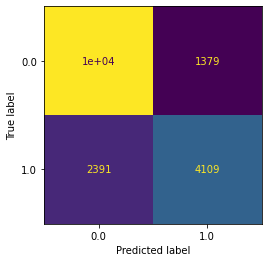

In [77]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(RF_model, X_test, y_test, colorbar = False) 


<ipython-input-120-1b1c48bf5afa>:28: UserWarning: Matplotlib is currently using TkAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-120-1b1c48bf5afa>:95: UserWarning: Matplotlib is currently using TkAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


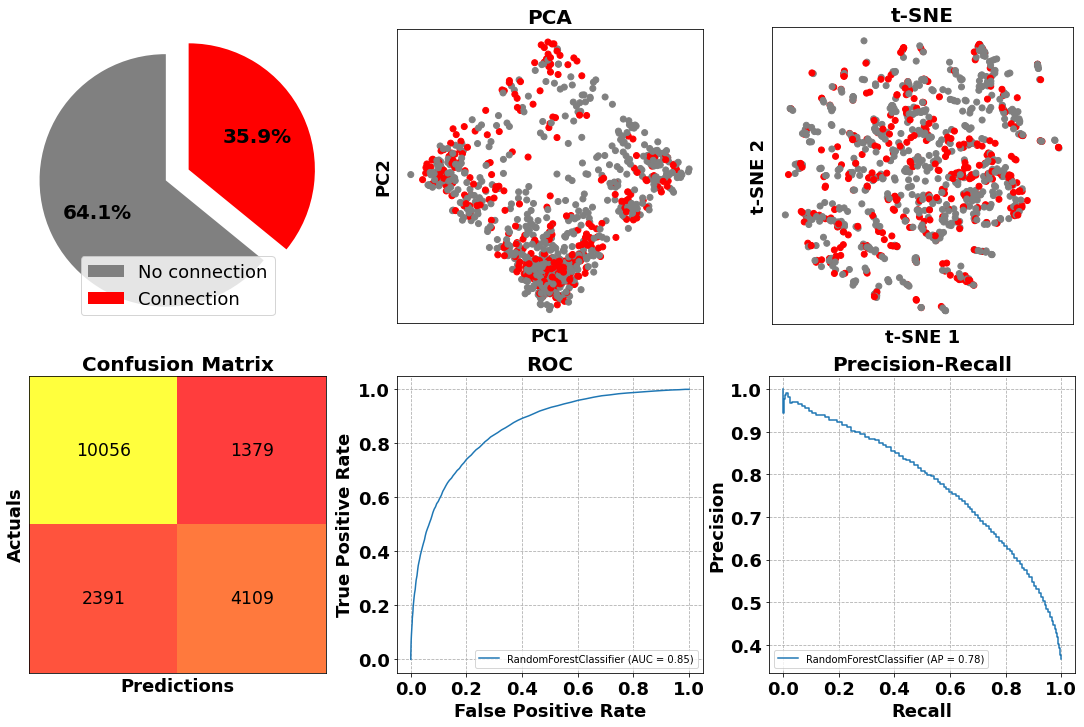

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



fig = plt.figure(figsize=(15, 10))

gs = GridSpec(nrows=2, ncols=3)
if 1 ==1:
    
    ax1 = fig.add_subplot(gs[0,0])
    labels=['No connection','Connection']
    explode = (0, 0.2)
    X=[114976,64376] 
    colors = ['grey','red']

    wedges, texts, autotexts  =ax1.pie(X, explode=explode,  colors=colors, autopct='%1.1f%%',
            shadow=False, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    ax1.legend(wedges, labels,
              loc='lower center', fontsize = 18)
    plt.setp(autotexts, size=20, weight="bold")

    plt.tight_layout()
    plt.show()
if 1 == 1:
    ax2 = fig.add_subplot(gs[0,1])
    colors = {1:'red', 0:'grey'}
    ax2.axis('equal')
    ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')
    plt.scatter(pca[:, 0][index], pca[:, 1][index], c = pd.Series(class_Target[index]).map(colors),
               )#, '.')
    x0,x1 = ax2.get_xlim()
    y0,y1 = ax2.get_ylim()
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title('PCA', fontsize = 20, weight = 'bold')
    plt.xlabel('PC1', weight="bold", fontsize = 18)
    plt.ylabel('PC2', weight="bold", fontsize = 18)

if 1 == 1:
    ax3 = fig.add_subplot(gs[0,2])
    colors = {1:'red', 0:'grey'}
    ax3.axis('equal')
    ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')
    plt.scatter(tsne_results[:, 0][index], tsne_results[:, 1][index], c = pd.Series(class_Target[index]).map(colors),
               )#, '.')
    x0,x1 = ax3.get_xlim()
    y0,y1 = ax3.get_ylim()
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_title('t-SNE', fontsize = 20, weight = 'bold')
    plt.xlabel('t-SNE 1', weight="bold", fontsize = 18)
    plt.ylabel('t-SNE 2', weight="bold", fontsize = 18)
 
if 1 == 1:
    ax4 = fig.add_subplot(gs[1,0])
    y_pred = RF_model.predict(X_test)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    for i in range(2):
        for j in range(2):
            ax4.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
            ax4.matshow(conf_matrix, cmap=plt.cm.autumn, alpha=0.3)
            ax4.set_xticks([])
            ax4.set_yticks([])
            plt.xlabel('Predictions', fontsize=18, weight ='bold')
            plt.ylabel('Actuals', fontsize=18, weight ='bold')
            plt.title('Confusion Matrix', fontsize=20, weight ='bold')
    
if 1 == 1:
    ax5 = fig.add_subplot(gs[1,1])
    metrics.plot_roc_curve(RF_model, X_test, y_test,ax=ax5)
    ax5.set_title('ROC', fontsize = 20, weight = 'bold')
    ax5.grid(linestyle='--')
    plt.ylabel('True Positive Rate', weight ='bold', fontsize = 18)
    plt.xlabel('False Positive Rate', weight ='bold', fontsize = 18)  
    plt.xticks(weight ='bold', fontsize = 18)
    plt.yticks(weight ='bold', fontsize = 18)

            
if 1 == 1:
    ax6 = fig.add_subplot(gs[1,2])
    metrics.plot_precision_recall_curve(RF_model, X_test, y_test,ax=ax6)
    ax6.set_title('Precision-Recall', fontsize = 20, weight = 'bold')
    ax6.grid(linestyle='--')
    plt.ylabel('Precision', weight ='bold', fontsize = 18)
    plt.xlabel('Recall', weight ='bold', fontsize = 18)
    plt.xticks(weight ='bold', fontsize = 18)
    plt.yticks(weight ='bold', fontsize = 18)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
plt.savefig('Figure/Fig2_new.pdf')

In [107]:
plt.cm.autumn

<ipython-input-82-fb173174acde>:13: UserWarning: Matplotlib is currently using TkAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


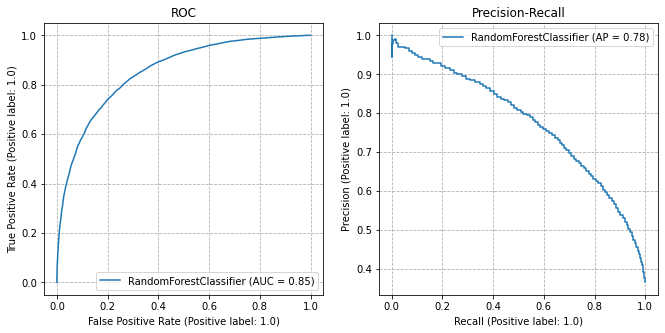

In [82]:
import sklearn.metrics as metrics
fig, [ax_roc, ax_pre] = plt.subplots(1, 2, figsize=(11, 5))

metrics.plot_roc_curve(RF_model, X_test, y_test,ax=ax_roc)
metrics.plot_precision_recall_curve(RF_model, X_test, y_test,ax=ax_pre)
ax_roc.set_title('ROC')
ax_pre.set_title('Precision-Recall')

ax_roc.grid(linestyle='--')
ax_pre.grid(linestyle='--')

plt.legend()
plt.show()


### Repeat Ji's work

In [4]:
# random forest

# build a df to store the information

# instead use the subset, this time I am trying the whole, which might be not suitable for ML, but I just wanted a positive control
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
res_df =[]


Target = []
Dataset = []


for i in range(Celltype_mtx_norm.shape[0]):
    for j in range(Celltype_mtx_norm.shape[0]):
        # ignore self connectivity

        if i == j:
            pass       
        else:

            #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
            #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
            Dataset.append(np.concatenate((Celltype_mtx_norm[i,:],Celltype_mtx_norm[j,:])))
            Target.append(Connectome_direct_density[i,j])
            
            

Dataset = np.stack(Dataset)

import statistics as stats
cutoff = stats.mean(Target)
class_Target = [1 if x >cutoff else 0 for x in Target]
class_Target =np.array([np.array(xi) for xi in class_Target])   

In [11]:
cutoff

0.0

In [13]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle= True)
auc_list = []
acc_list = []
p = 0
for train_index, test_index in kf.split(Dataset):

    p = p +1
    print(p)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = Dataset[sub1], Dataset[sub2]
    y_train, y_test = class_Target[sub1], class_Target[sub2]
    RF_model = RandomForestClassifier(n_estimators=100, max_features = 20)
    RF_model.fit(X_train, y_train)

    #list_r2.append(r2_score(y_test, Predict))
    predicts = RF_model.predict_proba(X_test)
    print(metrics.roc_auc_score(y_test, predicts[:,1]))
    auc_list.append(metrics.roc_auc_score(y_test, predicts[:,1]))
    bin_predict = [1 if x >0.5 else 0 for x in predicts[:,1]]
    print(metrics.accuracy_score(y_test, bin_predict))
    acc_list.append(metrics.accuracy_score(y_test, bin_predict))

1
0.9190446031623956
0.9243421052631579
2
0.9202527334920109
0.9262377341659233
3
0.9209312196228173
0.9249512127125732
4
0.9159691840101346
0.9244494006133259
5
0.917873620350639
0.9289099526066351
6
0.9159559073689976
0.9219403401170895
7
0.9179273019502381
0.9276275439085587
8
0.9178451570623956
0.9239475885140787
9
0.9175045355260392
0.9230554781154168
10
0.9184992089087526
0.9274045163088932


In [ ]:





   
#X_train, X_test, y_train, y_test = train_test_split(Dataset, Target,test_size=.2,random_state =123)  

# in total 55 features, (25 + 25) + 1 + (1 + 1) + (1 + 1)
kf = KFold(n_splits=10, shuffle= True)
list_r2 = []

p = 0 
for train_index, test_index in kf.split(df_lD):
    p = p + 1
    #print(train_index)
    #print(test_index)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = df_lD.iloc[sub1], df_lD.iloc[sub2]
    y_train, y_test = Target_lD[sub1], Target_lD[sub2]
    RF_model_1 = RandomForestRegressor(n_estimators=100,max_features = 20,max_depth=30)
    RF_model_1.fit(X_train, y_train)
    print('Traing fit')
    Predict = RF_model_1.predict(X_train)
    print(r2_score(y_train, Predict))
    print('Testing fit')
    Predict = RF_model_1.predict(X_test)
    print(r2_score(y_test, Predict))
    list_r2.append(r2_score(y_test, Predict))
    importances = RF_model_1.feature_importances_
    indices = np.argsort(importances)[::-1]
    Celltype_scores = importances[:25] + importances[25:]
    if p ==1 :
        
        df_feature_important_l = {'Celltype_Names': CellNames, 'Feature_importance': list(Celltype_scores)}
        df_feature_important_l = pd.DataFrame(data=df_feature_important_l,dtype=np.int32)
    else:
        _df_feature_important_l = {'Celltype_Names': CellNames, 'Feature_importance': list(Celltype_scores)}
        _df_feature_important_l = pd.DataFrame(data=_df_feature_important_l,dtype=np.int32)
        df_feature_important_l = df_feature_important_l.append(_df_feature_important_l)
        
l_cell = list_r2.copy()